### Data cleaning

In [54]:
import numpy as np
import pandas as pd
import os
import scipy.io
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
os.chdir("../")
os.getcwd()

'c:\\Users\\pushk\\OneDrive\\Documents\\deep_learning_project\\case_study\\jupyter_codespace'

In [16]:
# load all file paths from the dataset
def load_filelist():
    
    FILELIST = []
    for dirname, _, filenames in os.walk('data\\nasa_battery_dataset'):
        for filename in filenames:
            # print(f"accessing {filename}")
            #filepath = filename
            FILELIST.append(os.path.join(dirname, filename))
    return FILELIST
            
# filter the list of file paths, keep only .mat files
def filter_matfiles_list(filelist):
    filelist = [filepath for filepath in filelist if filepath.endswith('.mat')]
    filelist = [filepath for filepath in filelist if "BatteryAgingARC_25_26_27_28_P1" not in filepath] # removing duplicates
    return filelist

# Function to load a .mat file and simplify its structure
def loadmat(filepath):
    return scipy.io.loadmat(filepath, simplify_cells=True)

#### Structure of .mat files


- **dictionary** (loaded mat file)
    - **dictionary** (e.g. B0005)
        - **list (cycle)** -> one test per element in the list
            - element of the list = dict = all data for one test of that battery
                - **type**:  operation  type, can be charge, discharge or impedance
                - **capacity**:  capacity of the battery (Ahr)
                - **cycle**:  cycle number for the test
                - **id**:  battery id
                - **temperature**:  battery temperature (degree C)
                - **voltage**:  battery voltage (Volts)
                - **current**:  battery current (Amps)
                - **ambient_temperature**:  ambient temperature (degree C)
                - **time**:  the date and time of the start of the cycle, in MATLAB  date vector format
                - **data (dict)**:  data structure containing the measurements
                    - data fields with key being measured variable, values the actual records (see below)
                    
                    
*    for charge the fields are:
    *     Voltage_measured: 	Battery terminal voltage (Volts)
    *     Current_measured:	Battery output current (Amps)
    *     Temperature_measured: 	Battery temperature (degree C)
    *     Current_charge:		Current measured at charger (Amps)
    *     Voltage_charge:		Voltage measured at charger (Volts)
    *     Time:			Time vector for the cycle (secs)
*    for discharge the fields are:
    *     Voltage_measured: 	Battery terminal voltage (Volts)
    *     Current_measured:	Battery output current (Amps)
    *     Temperature_measured: 	Battery temperature (degree C)
    *     Current_load:		Current measured at load (Amps)
    *     Voltage_load:		Voltage measured at load (Volts)
    *     Time:			Time vector for the cycle (secs)
    *     Capacity:		Battery capacity (Ahr) for discharge till 2.7V 
*    for impedance the fields are:
    *     Sense_current:		Current in sense branch (Amps)
    *     Battery_current:	Current in battery branch (Amps)
    *     Current_ratio:		Ratio of the above currents 
    *     Battery_impedance:	Battery impedance (Ohms) computed from raw data
    *     Rectified_impedance:	Calibrated and smoothed battery impedance (Ohms) 
    *     Re:			Estimated electrolyte resistance (Ohms)
    *     Rct:			Estimated charge transfer resistance (Ohms)

#### Cleaning continued...

In [17]:
FILELIST = filter_matfiles_list(load_filelist())

In [ ]:
# for dirname, _, filenames in os.walk('data/nasa_battery_dataset'):
#     # print(dirname)
#     # print("----")
#     # print(_)
#     # print("----")
#     for filename in filenames:
#         print(filename)

In [ ]:
matfile = loadmat("data/nasa_battery_dataset/BatteryAgingArc-FY08Q4/B0005.mat")
df = pd.DataFrame(data=matfile['B0005']['cycle'][0]['data'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 789 entries, 0 to 788
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Voltage_measured      789 non-null    float64
 1   Current_measured      789 non-null    float64
 2   Temperature_measured  789 non-null    float64
 3   Current_charge        789 non-null    float64
 4   Voltage_charge        789 non-null    float64
 5   Time                  789 non-null    float64
dtypes: float64(6)
memory usage: 37.1 KB


In [ ]:
df.describe()

,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Time
count,789.000000,789.000000,789.000000,789.000000,789.000000,789.000000
mean,4.187420,0.643455,25.324079,0.638452,4.359487,2725.952433
std,0.045794,0.625804,1.011951,0.621598,0.881125,2233.400767
min,3.479394,-4.030268,24.167062,-4.036000,0.003000,0.000000
25%,4.190885,0.084497,24.404019,0.081000,4.261000,702.500000
50%,4.205710,0.387115,25.060947,0.382000,4.402000,2177.047000
75%,4.206481,1.496159,26.056859,1.485000,4.823000,4467.703000
max,4.209949,1.514393,27.445134,1.500000,4.931000,7597.875000


In [ ]:
def plot_test_data(df, profile="charge"):
    
    if profile=='charge':
        plt.figure(figsize=(10,4))
        plt.plot(df.Time, df.Voltage_measured, 'b', label='Voltage_measured')
        plt.plot(df.Time, df.Current_measured, 'r', label='Current_measured')
        plt.legend()
        plt.title('Voltage and Current over Time')
        plt.xlabel('Time (s)')
        plt.ylabel('Value')
        plt.show()

        plt.figure(figsize=(10,4))
        plt.plot(df.Time, df.Voltage_charge, 'b', label='Voltage_charge')
        plt.plot(df.Time, df.Current_charge, 'r', label='Current_charge')
        plt.legend()
        plt.title('Voltage Charge and Current Charge over Time')
        plt.xlabel('Time (s)')
        plt.ylabel('Value')
        plt.show()

        plt.figure(figsize=(10,4))
        plt.plot(df.Time, df.Temperature_measured, 'k', label='Temperature_measured')
        plt.legend()
        plt.title('Temperature over Time')
        plt.xlabel('Time (s)')
        plt.ylabel('Temperature (°C)')
        plt.show()
    elif profile=='discharge':
        plt.figure(figsize=(10,4))
        plt.plot(df.Time, df.Voltage_measured, 'b', label='Voltage_measured')
        plt.plot(df.Time, df.Current_measured, 'r', label='Current_measured')
        plt.legend()
        plt.title('Voltage and Current over Time')
        plt.xlabel('Time (s)')
        plt.ylabel('Value')
        plt.show()

        plt.figure(figsize=(10,4))
        plt.plot(df.Time, df.Voltage_load, 'b', label='Voltage_load')
        plt.plot(df.Time, df.Current_load, 'r', label='Current_load')
        plt.legend()
        plt.title('Voltage Load and Current Load over Time')
        plt.xlabel('Time (s)')
        plt.ylabel('Value')
        plt.show()

        plt.figure(figsize=(10,4))
        plt.plot(df.Time, df.Temperature_measured, 'k', label='Temperature_measured')
        plt.legend()
        plt.title('Temperature over Time')
        plt.xlabel('Time (s)')
        plt.ylabel('Temperature (°C)')
        plt.show()
    elif profile=='impedance':
        pass
    else:
        print('No cycle recognized')
        

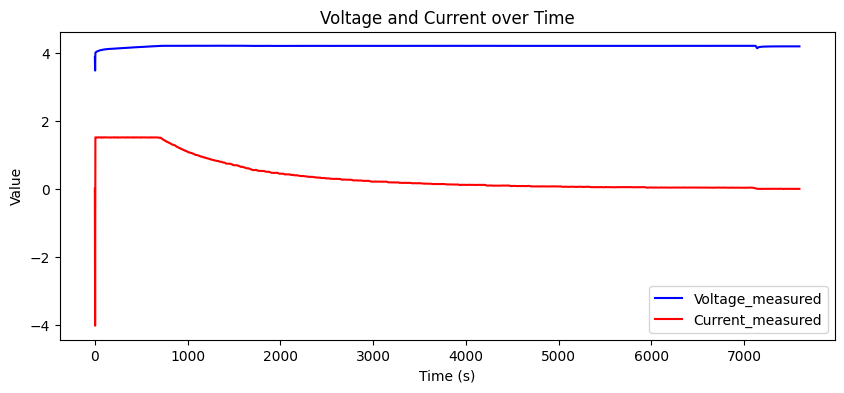

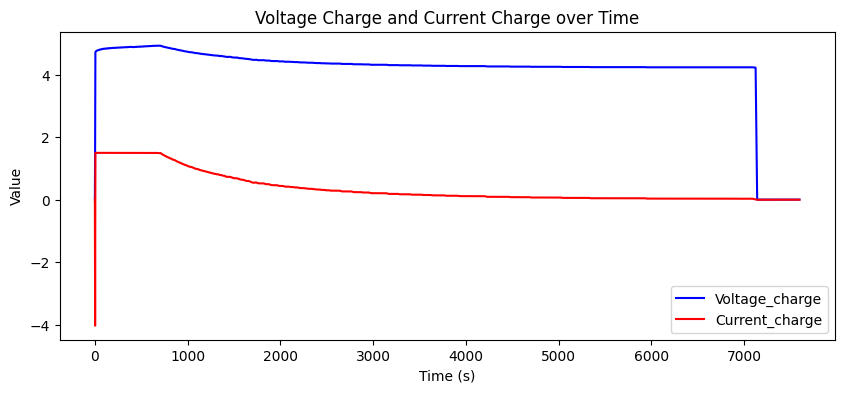

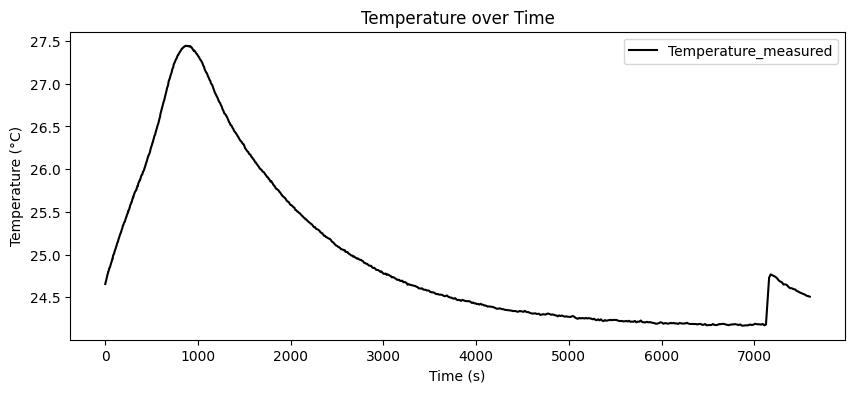

In [ ]:
plot_test_data(df)

In [ ]:
df = pd.DataFrame(data=matfile['B0005']['cycle'][1]['data'])
df.head()

,Voltage_measured,Current_measured,Temperature_measured,Current_load,Voltage_load,Time,Capacity
0,4.191492,-0.004902,24.330034,-0.0006,0.000,0.000,1.856487
1,4.190749,-0.001478,24.325993,-0.0006,4.206,16.781,1.856487
2,3.974871,-2.012528,24.389085,-1.9982,3.062,35.703,1.856487
3,3.951717,-2.013979,24.544752,-1.9982,3.030,53.781,1.856487
4,3.934352,-2.011144,24.731385,-1.9982,3.011,71.922,1.856487


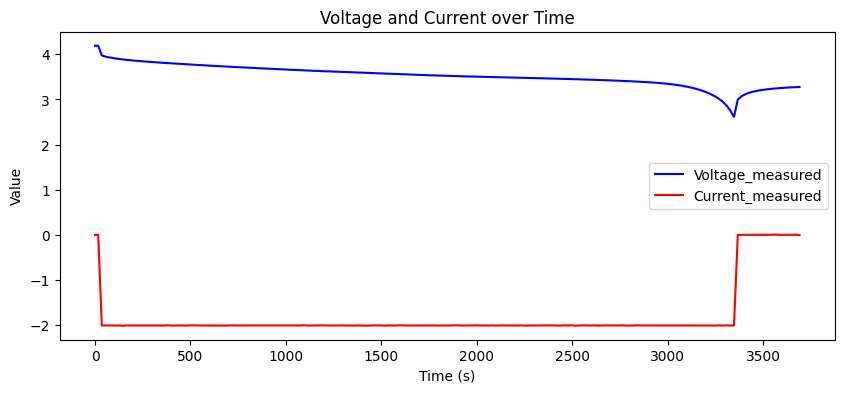

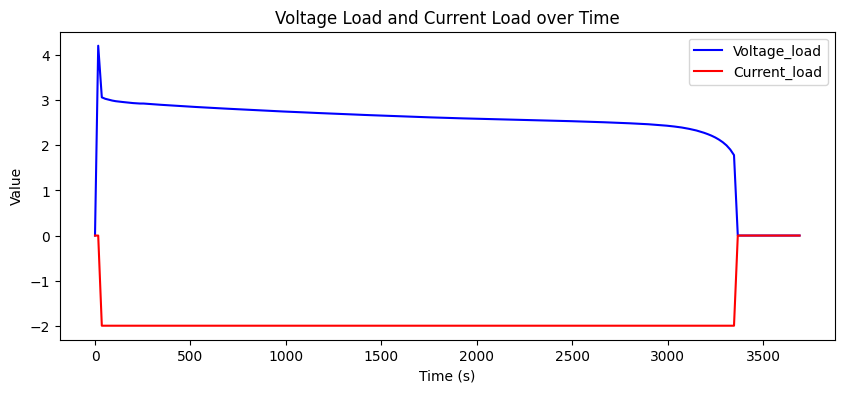

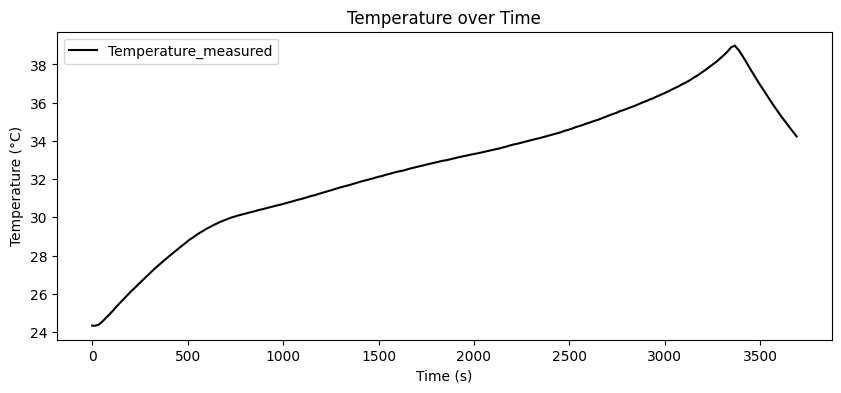

In [ ]:
plot_test_data(df,profile='discharge')

In [46]:
# Re (Electrolyte Resistance):
# Estimated electrolyte resistance of the battery, in ohms (Ω).
# Derived from impedance measurements and represents the resistance of the electrolyte within the battery.

# 'Rct' (Charge Transfer Resistance):
# Estimated charge transfer resistance, in ohms (Ω).
# Resistance to the transfer of charge during electrochemical reactions.

# 'Capacity':
# Battery capacity, measured in ampere-hours (Ahr).
# Indicates amount of charge the battery can store and deliver during discharge. 
# For discharge cycles, typically measured until the battery voltage drops to a specific cutoff value (usually around 2.5V).

In [ ]:
def process_data_dict(data_dict):
    """ Creates two dictionaries:
    - ndict: new dictionary with the test data to build a corresponding dataframe
    - metadata_dict: anything that doesn't fit in ndict ('Capacity' is just a float)
    """
    
    ndict = {}
    metadata_dict = {}
    for k, v in data_dict.items():
        if k not in ['Capacity', 'Re', 'Rct']:
            ndict[k]=v
        elif k == 'Capacity':
            metadata_dict[k]=v
        elif k == 'Re':
            metadata_dict[k]=v
        elif k == 'Rct':
            metadata_dict[k]=v
        else:
            print("---useless data---")
    
    return ndict, metadata_dict


def fill_metadata_row(metadata, test_type, test_start_time, test_temperature, battery_name, test_id, uid, filename, capacity, re, rct):
    tmp = pd.DataFrame(data=[test_type, test_start_time, test_temperature, battery_name, test_id, uid, filename, capacity, re, rct])
    tmp = tmp.transpose()
    tmp.columns = metadata.columns
    metadata = pd.concat((metadata, tmp), axis=0)
    return metadata


def extract_more_metadata(metadata_dict):
    
    if 'Capacity' in metadata_dict.keys():
        capacity = metadata_dict['Capacity']
    else:
        capacity = np.nan
        
    if 'Re' in metadata_dict.keys():
        re = metadata_dict['Re']
    else:
        re = np.nan
        
    if 'Rct' in metadata_dict.keys():
        rct = metadata_dict['Rct']
    else:
        rct = np.nan
    
    return capacity, re, rct

In [32]:
metadata = pd.DataFrame(data=None, columns=['type', 'start_time', 'ambient_temperature', 'battery_id', 'test_id', 'uid', 'filename', 'Capacity', 'Re', 'Rct'])
battery_list = [item.split('\\')[-1].split('.')[0] for item in FILELIST]

In [27]:
# save all CSV files
current_dir = os.getcwd()
# os.listdir(CWD)
directory = "data\\nasa_processed_data"
path = os.path.join(current_dir, directory)
if not os.path.exists(path):
    os.mkdir(path)


In [33]:
uid = 0
# counter = 0
for battery_name, mat_filepath in zip(battery_list, FILELIST):
    # counter +=1
    
    mat_data = scipy.io.loadmat(mat_filepath, simplify_cells=True)
    print(mat_filepath[-10:],"-->", battery_name)
    test_list = mat_data[battery_name]['cycle']
    
    for test_id in range(len(test_list)):
        
        uid += 1
        filename = str(uid).zfill(5)+'.csv'
        filepath = 'data\\nasa_processed_data\\' + filename

        # Extract the specific test data and save it as CSV! 
        ndict, metadata_dict = process_data_dict(test_list[test_id]['data'])
        test_df = pd.DataFrame.from_dict(ndict, orient='index')
        test_df = test_df.transpose()

        test_df.to_csv(filepath, index=False)
                
        # Add test information to the metadata
        test_type = test_list[test_id]['type']
        test_start_time = test_list[test_id]['time']
        test_temperature = test_list[test_id]['ambient_temperature']
        
        capacity, re, rct = extract_more_metadata(metadata_dict)
        metadata = fill_metadata_row(metadata, test_type, test_start_time, test_temperature, battery_name, test_id, uid, filename, capacity, re, rct)

\B0005.mat --> B0005
\B0006.mat --> B0006
\B0007.mat --> B0007
\B0018.mat --> B0018
\B0025.mat --> B0025
\B0026.mat --> B0026
\B0027.mat --> B0027
\B0028.mat --> B0028
\B0029.mat --> B0029
\B0030.mat --> B0030
\B0031.mat --> B0031
\B0032.mat --> B0032
\B0033.mat --> B0033
\B0034.mat --> B0034
\B0036.mat --> B0036
\B0038.mat --> B0038
\B0039.mat --> B0039
\B0040.mat --> B0040
\B0041.mat --> B0041
\B0042.mat --> B0042
\B0043.mat --> B0043
\B0044.mat --> B0044
\B0045.mat --> B0045
\B0046.mat --> B0046
\B0047.mat --> B0047
\B0048.mat --> B0048
\B0049.mat --> B0049
\B0050.mat --> B0050
\B0051.mat --> B0051
\B0052.mat --> B0052
\B0053.mat --> B0053
\B0054.mat --> B0054
\B0055.mat --> B0055
\B0056.mat --> B0056


In [35]:
# Further cleaning of the metadata. start_time is currently in float format
# It is in inconsisten time format as well.
# e.g.  list of floats: [2010.0, 9.0, 30.0, 12.0, 31.0. 10.171]
from datetime import datetime

metadata = metadata.reset_index(drop=True)
def convert_to_datetime(row):
    # Convert the float values to integers
    year = int(row[0])
    month = int(row[1])
    day = int(row[2])
    hour = int(row[3])
    minute = int(row[4])
    second = int(row[5])

    # Create a datetime object
    dt = datetime(year, month, day, hour, minute, second)
    
    return dt
# Apply the function to the 'start_time' column
metadata['start_time'] = metadata['start_time'].apply(lambda x: convert_to_datetime(x))


metadata

,type,start_time,ambient_temperature,battery_id,test_id,uid,filename,Capacity,Re,Rct
0,charge,2008-04-02 13:08:17,24,B0005,0,1,00001.csv,NaN,NaN,NaN
1,discharge,2008-04-02 15:25:41,24,B0005,1,2,00002.csv,1.856487,NaN,NaN
2,charge,2008-04-02 16:37:51,24,B0005,2,3,00003.csv,NaN,NaN,NaN
3,discharge,2008-04-02 19:43:48,24,B0005,3,4,00004.csv,1.846327,NaN,NaN
4,charge,2008-04-02 20:55:40,24,B0005,4,5,00005.csv,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
7560,impedance,2010-09-30 07:36:45,24,B0056,247,7561,07561.csv,NaN,0.102677,0.170394
7561,discharge,2010-09-30 08:08:36,4,B0056,248,7562,07562.csv,1.137273,NaN,NaN
7562,charge,2010-09-30 08:48:54,4,B0056,249,7563,07563.csv,NaN,NaN,NaN
7563,discharge,2010-09-30 11:50:17,4,B0056,250,7564,07564.csv,1.129059,NaN,NaN


In [36]:
metadata.to_csv('data\\metadata.csv', index=False)

In [41]:
#first entry
metadata['start_time'][0].year

#metadata['start_time'][0].month

2008

In [37]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   type                 7565 non-null   object        
 1   start_time           7565 non-null   datetime64[ns]
 2   ambient_temperature  7565 non-null   object        
 3   battery_id           7565 non-null   object        
 4   test_id              7565 non-null   object        
 5   uid                  7565 non-null   object        
 6   filename             7565 non-null   object        
 7   Capacity             2794 non-null   object        
 8   Re                   1956 non-null   object        
 9   Rct                  1956 non-null   object        
dtypes: datetime64[ns](1), object(9)
memory usage: 591.1+ KB


In [45]:
metadata[(metadata['battery_id']=='B0005') & (metadata['start_time']<'2008-04-03')]

,type,start_time,ambient_temperature,battery_id,test_id,uid,filename,Capacity,Re,Rct
0,charge,2008-04-02 13:08:17,24,B0005,0,1,00001.csv,NaN,NaN,NaN
1,discharge,2008-04-02 15:25:41,24,B0005,1,2,00002.csv,1.856487,NaN,NaN
2,charge,2008-04-02 16:37:51,24,B0005,2,3,00003.csv,NaN,NaN,NaN
3,discharge,2008-04-02 19:43:48,24,B0005,3,4,00004.csv,1.846327,NaN,NaN
4,charge,2008-04-02 20:55:40,24,B0005,4,5,00005.csv,NaN,NaN,NaN


##### Battery id B0005 On 2008-04-02; Only charging and discharging data recorded on the day

In [ ]:
import shutil
shutil.make_archive('processed_data', 'zip', 'data\\nasa_processed_data')

'c:\\Users\\e13830\\OneDrive - Konica Minolta\\e-learnings\\image_ai_course\\jupyter_codespace\\processed_data.zip'

### Dataset observation

Repeated charge and discharge cycles result in accelerated aging of the batteries while impedance measurements provide insight into the internal battery parameters that change as aging progresses.

- Charge profile:
    - The charge profile for all battery tests seems to be identifical.
    - Charging was carried out in a constant current (CC) mode at 1.5A until the battery voltage reached 4.2V and then continued in a constant voltage (CV) mode until the charge current dropped to 20mA. 

- Discharge:
    - Discharge profiles were different from battery to battery.
    - Discharge was carried out at a constant current (CC) level of 1-4 A until the battery voltage fell to values such 2.7V, 2.5V, 2.2V and 2.5V.

- Impedance:
    - Impedance measurement was carried out through an electrochemical impedance spectroscopy (EIS) frequency sweep from 0.1Hz to 5kHz.

The experiments were stopped when the batteries reached a given end-of-life (EOL) criteria: for example 30% fade in rated capacity (from 2Ahr to 1.4Ahr). Other stopping criteria were used such as 20% fade in rated capacity. Note that for batteries 49,50,51,52, the experiments were not stop due to battery EOL but because the software has crashed.


### Further EDA 

In [50]:
# Replace empty entries with np.nan in Capacity column
metadata.loc[metadata["Capacity"].apply(lambda x: isinstance(x, (list, np.ndarray)) and len(x) == 0), "Capacity"] = np.nan
metadata[metadata["Capacity"].apply(lambda x: isinstance(x, (list, np.ndarray)) and len(x) == 0)]["Capacity"]

Series([], Name: Capacity, dtype: object)

In [52]:
metadata.head()

,type,start_time,ambient_temperature,battery_id,test_id,uid,filename,Capacity,Re,Rct
0,charge,2008-04-02 13:08:17,24,B0005,0,1,00001.csv,NaN,NaN,NaN
1,discharge,2008-04-02 15:25:41,24,B0005,1,2,00002.csv,1.856487,NaN,NaN
2,charge,2008-04-02 16:37:51,24,B0005,2,3,00003.csv,NaN,NaN,NaN
3,discharge,2008-04-02 19:43:48,24,B0005,3,4,00004.csv,1.846327,NaN,NaN
4,charge,2008-04-02 20:55:40,24,B0005,4,5,00005.csv,NaN,NaN,NaN


In [53]:
#battery group as per raw data
battery_group = {"1": ["B0025", "B0026", "B0027", "B0028"],
                "2b": ["B0029", "B0030", "B0031", "B0032"],
                "2c": ["B0033", "B0034", "B0036"],
                "2d": ["B0038", "B0039", "B0040"],
                "2e": ["B0041", "B0042", "B0043", "B0044"],
                "3": ["B0045", "B0046", "B0047", "B0048"],
                "4": ["B0049", "B0050", "B0051", "B0052"],
                "5": ["B0053", "B0054", "B0055", "B0056"],
                "6": ["B0005", "B0006", "B0007", "B0018"]}

In [100]:
# box plot for each battery group
#cells: dict of battery groups
# group: specific battery group
# metadata: dataframe with metadata
def plot_capacity_boxplot(cells: dict, group: str):
    plt.rcParams.update(plt.rcParamsDefault)
    
    # Create a DataFrame to store data for all batteries in the group
    all_data = pd.DataFrame()
    
    for cell in cells[group]:
        df = metadata[(metadata["battery_id"] == cell) & (metadata["type"] == "discharge")].copy()
        df["Capacity"] = df["Capacity"].astype(float)
        df["Battery"] = cell  # Add battery ID for grouping
        all_data = pd.concat([all_data, df], ignore_index=True)
    
    # Plot using seaborn
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=all_data, x="Battery", y="Capacity", palette="viridis")
    plt.title(f'Battery Capacity Boxplot for Group {group}')
    plt.ylim(-0.4, 2.9)
    plt.xlabel("Battery")
    plt.ylabel("Capacity [Ah]")
    plt.show()

In [ ]:
def plot_capacity_vs_cycle(cells: dict, group: str):
    plt.rcParams.update(plt.rcParamsDefault)
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Create a DataFrame to store data for all batteries in the group
    all_data = pd.DataFrame()
    
    for cell in cells[group]:
        df = metadata[(metadata["battery_id"] == cell) & (metadata["type"] == "discharge")].copy()
        df["Capacity"] = df["Capacity"].astype(float)
        df["cycle"] = range(len(df))
        df["Battery"] = cell  # Add battery ID for grouping
        all_data = pd.concat([all_data, df], ignore_index=True)
    
    # Plot using seaborn
    sns.lineplot(data=all_data, x="cycle", y="Capacity", hue="Battery", marker='o', palette="viridis")
    plt.axhline(70.0, color='k', linestyle='--', label="Threshold (70%)")
    plt.title(f'Battery Capacity vs Cycle for Group {group}')
    plt.ylim(0, 2.49)
    plt.xlim(0, 199)
    plt.xlabel("Cycle number")
    plt.ylabel("Capacity [Ah]")
    plt.legend(loc="best")
    plt.show()

In [69]:
def plot_SOH_vs_cycle(cells: dict, group: str):
    plt.rcParams.update(plt.rcParamsDefault)
    fig, ax = plt.subplots()
    for cell in cells[group]:
        df = metadata[(metadata["battery_id"]==cell) & (metadata["type"]=="discharge")].copy()
        df["Capacity"] = df["Capacity"].astype(float)/2.0 * 100.0
        df["cycle"] = range(len(df))
        ax.plot(df["cycle"], df["Capacity"], marker='.', label=cell)
        
    plt.axhline(70.0, color='k', linestyle='--')    
    plt.legend()
    plt.title(f'Battery SOH vs Cyclefor Group {group}')
    plt.ylim(0,119)
    plt.xlim(0,199)
    plt.xlabel("Cycle number")
    plt.ylabel("SOH %")
    plt.rcParams['axes.titley'] = 1.0 # title inside
    plt.rcParams['axes.titlepad'] = -14  # pad is in points...
    plt.show()

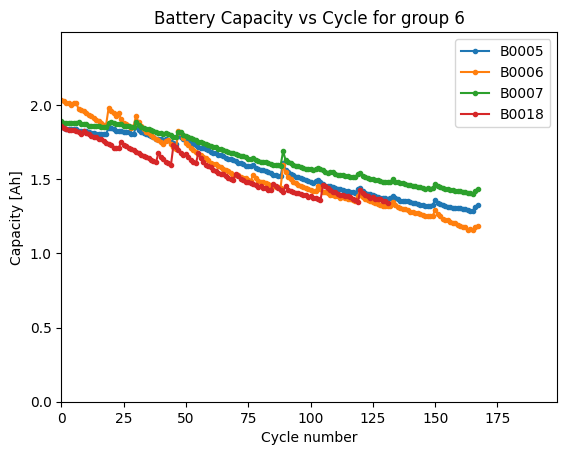

C:\Users\pushk\AppData\Local\Temp\ipykernel_22188\816093537.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




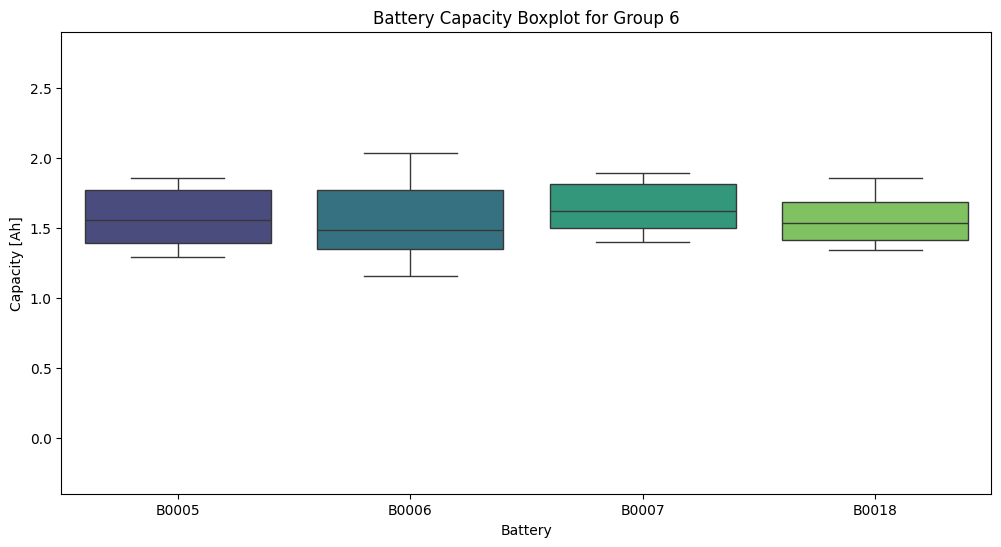

In [101]:
GROUP = "6"
plot_capacity_vs_cycle(battery_group, GROUP)
plot_capacity_boxplot(battery_group, GROUP)
# plot_SOH_vs_cycle(battery_group, GROUP)

In [71]:
# Label each battery with their group
metadata["Group"] = ""
for key in list(battery_group.keys()):
    for cell in battery_group[key]:
        metadata.loc[metadata["battery_id"]==cell, "Group"] = key
    
metadata.head()

,type,start_time,ambient_temperature,battery_id,test_id,uid,filename,Capacity,Re,Rct,Group
0,charge,2008-04-02 13:08:17,24,B0005,0,1,00001.csv,NaN,NaN,NaN,6
1,discharge,2008-04-02 15:25:41,24,B0005,1,2,00002.csv,1.856487,NaN,NaN,6
2,charge,2008-04-02 16:37:51,24,B0005,2,3,00003.csv,NaN,NaN,NaN,6
3,discharge,2008-04-02 19:43:48,24,B0005,3,4,00004.csv,1.846327,NaN,NaN,6
4,charge,2008-04-02 20:55:40,24,B0005,4,5,00005.csv,NaN,NaN,NaN,6


In [74]:
# arrange all the battery ids in a list
battery_list = []
for key in list(battery_group.keys()):
    for cell in battery_group[key]:
        battery_list.append(cell)


battery_list= sorted(battery_list)
# battery_list

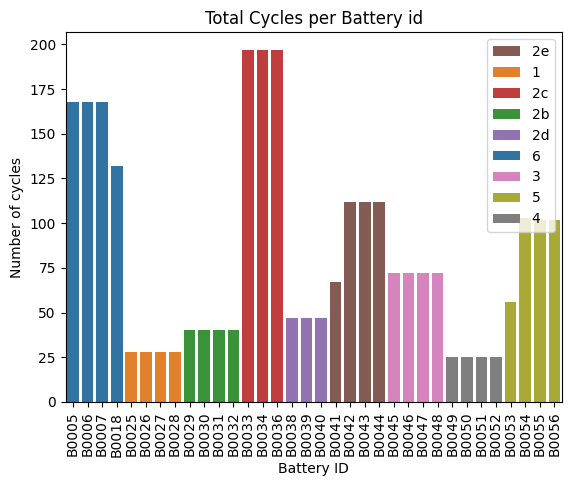

In [ ]:
plt.rcParams.update(plt.rcParamsDefault)
sns.countplot(data=metadata[metadata["type"]=="discharge"], x="battery_id", order=battery_list, dodge=False, hue=metadata["Group"])
plt.tick_params(axis='x', rotation=90)
plt.ylabel("Number of cycles")
plt.xlabel("Battery ID")

#get handles and labels
handles, labels = plt.gca().get_legend_handles_labels()

#specify order of items in legend
order = [5,1,3,2,4,0,6,8,7] # manually set order of legend items

#add legend to plot
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc="upper right") 

plt.title('Total Cycles per Battery ID')
plt.show()

##### Plotting trends among of voltage and current while charging and discharging

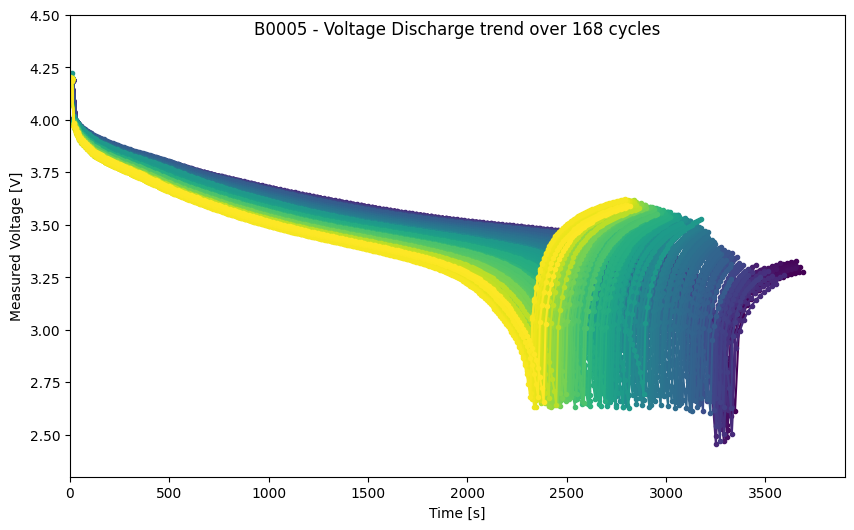

In [ ]:
# Plot voltage vs time during discharging cycles
BATTERY_ID = "B0005" #example battery id
filenames = metadata[(metadata["battery_id"] == BATTERY_ID) & (metadata["type"] == "discharge")]['filename'].tolist()

cycle = 1
N = len(filenames)
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.viridis(np.linspace(0, 1, N)))

fig, ax = plt.subplots(figsize=(10, 6))  # Adjust figure size if needed
for filename in filenames:
    battery_data = pd.read_csv(f"data/nasa_processed_data/{filename}")
    ax.plot(battery_data["Time"], battery_data["Voltage_measured"], marker='.', label=f"Cycle {cycle}")
    cycle += 1

plt.ylim(2.3, 4.5)
plt.xlim(0, 3900)
plt.xlabel("Time [s]")
plt.ylabel("Measured Voltage [V]")
plt.title(f"{BATTERY_ID} - Voltage Discharge trend over {len(filenames)} cycles")
# plt.legend(loc="upper right", fontsize="small")  # Add legend for clarity
plt.show()


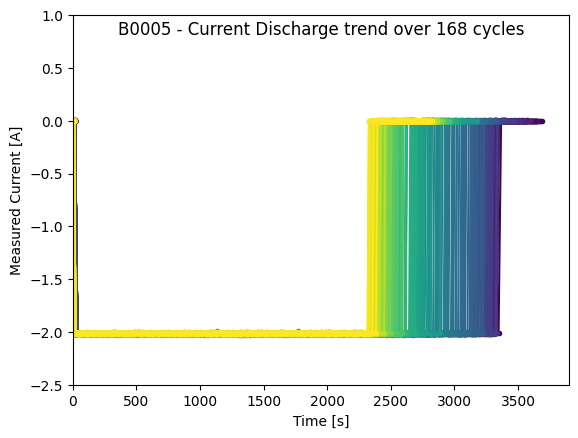

In [ ]:
# Plot current vs time during discharging cycles
filenames = metadata[(metadata["battery_id"]==BATTERY_ID) & (metadata["type"]=="discharge")]['filename'].tolist()

cycle = 1
N = len(filenames)
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.viridis(np.linspace(0,1,N)))
fig, ax = plt.subplots()
for filename in filenames:
    battery_data = pd.read_csv(f"data/nasa_processed_data/{filename}")
    ax.plot(battery_data["Time"], battery_data["Current_measured"], marker='.', label=cycle)
    cycle += 1
    
plt.ylim(-2.5,1) 
plt.xlim(0,3900)
plt.xlabel("Time [s]")
plt.ylabel("Measured Current [A]")
plt.rcParams['axes.titley'] = 1.0 # title inside
plt.rcParams['axes.titlepad'] = -14  # pad is in points...
plt.title(f"{BATTERY_ID} - Current Discharge trend over {len(filenames)} cycles")
plt.show()


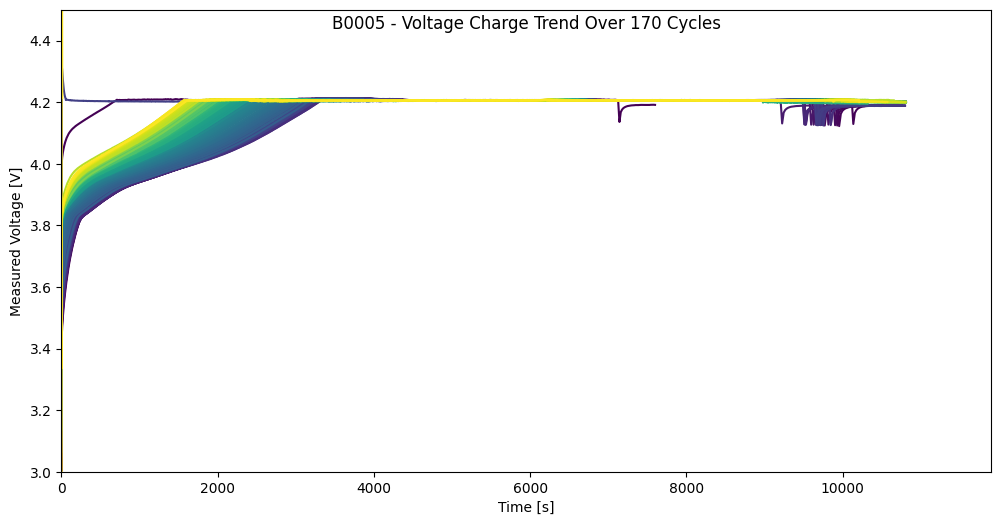

In [93]:
import seaborn as sns

# Plot voltage vs time during charging cycles using seaborn

filenames = metadata[(metadata["battery_id"] == BATTERY_ID) & (metadata["type"] == "charge")]['filename'].tolist()

# Create a DataFrame to store data for all cycles
all_cycles_data = pd.DataFrame()

for cycle, filename in enumerate(filenames, start=1):
    battery_data = pd.read_csv(f"data/nasa_processed_data/{filename}")
    battery_data["Cycle"] = cycle  # Add cycle number
    all_cycles_data = pd.concat([all_cycles_data, battery_data], ignore_index=True)

# Plot using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=all_cycles_data, x="Time", y="Voltage_measured", hue="Cycle", palette="viridis", legend=None)
plt.ylim(3, 4.5)
plt.xlim(0, 11900)
plt.xlabel("Time [s]")
plt.ylabel("Measured Voltage [V]")
plt.title(f"{BATTERY_ID} - Voltage Charge Trend Over {len(filenames)} Cycles")
plt.show()

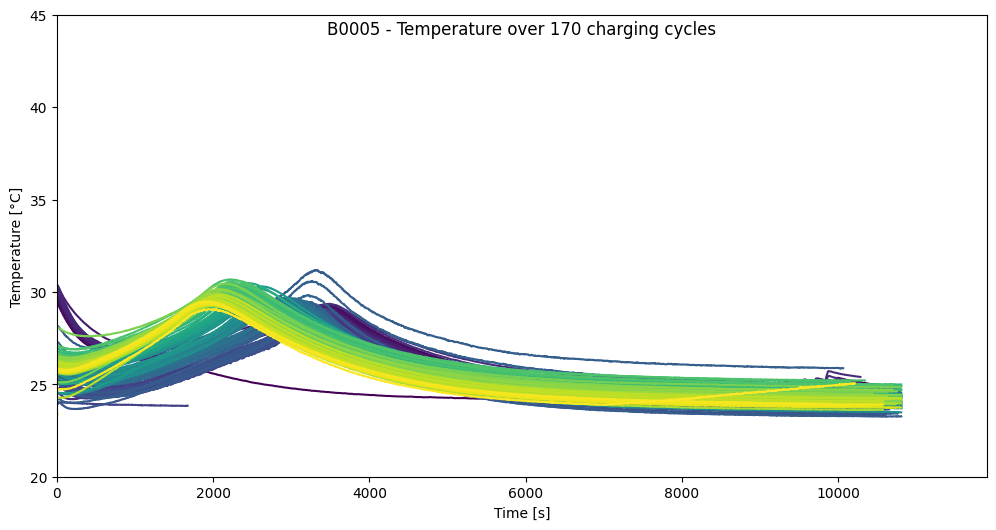

In [95]:
# Plot temperature vs time during Charging cycles using seaborn
filenames = metadata[(metadata["battery_id"] == BATTERY_ID) & (metadata["type"] == "charge")]['filename'].tolist()

# Create a DataFrame to store data for all cycles
all_cycles_data = pd.DataFrame()

for cycle, filename in enumerate(filenames, start=1):
    battery_data = pd.read_csv(f"data/nasa_processed_data/{filename}")
    battery_data["Cycle"] = cycle  # Add cycle number
    all_cycles_data = pd.concat([all_cycles_data, battery_data], ignore_index=True)

# Plot using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=all_cycles_data, x="Time", y="Temperature_measured", hue="Cycle", palette="viridis", legend=None)
plt.ylim(20, 45)
plt.xlim(0, 11900)
plt.xlabel("Time [s]")
plt.ylabel("Temperature [°C]")
plt.title(f"{BATTERY_ID} - Temperature over {len(filenames)} charging cycles")
plt.show()

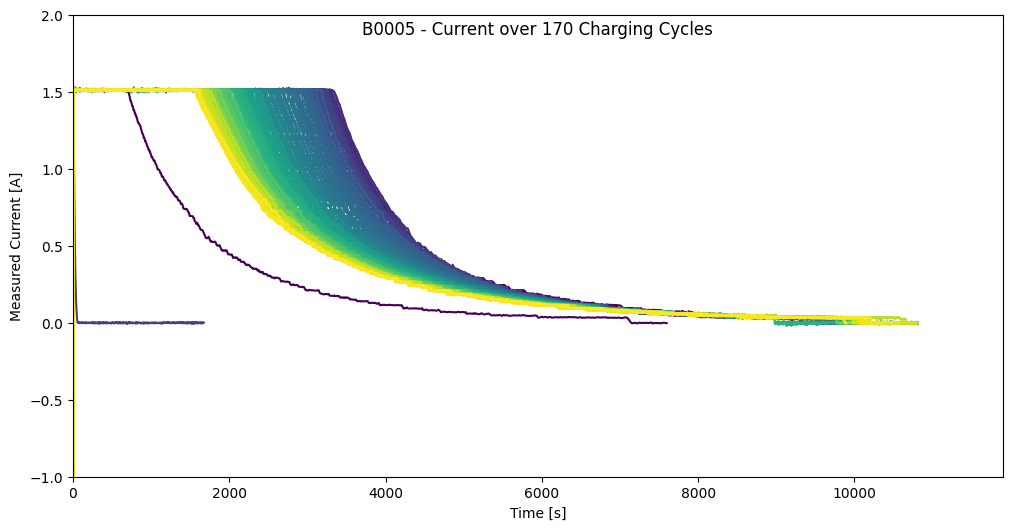

In [96]:
# Plot Current vs Time during charging cycles using seaborn
filenames = metadata[(metadata["battery_id"] == BATTERY_ID) & (metadata["type"] == "charge")]['filename'].tolist()

# Create a DataFrame to store data for all cycles
all_cycles_data = pd.DataFrame()

for cycle, filename in enumerate(filenames, start=1):
    battery_data = pd.read_csv(f"data/nasa_processed_data/{filename}")
    battery_data["Cycle"] = cycle  # Add cycle number
    all_cycles_data = pd.concat([all_cycles_data, battery_data], ignore_index=True)

# Plot using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=all_cycles_data, x="Time", y="Current_measured", hue="Cycle", palette="viridis", legend=None)
plt.ylim(-1, 2)
plt.xlim(0, 11900)
plt.xlabel("Time [s]")
plt.ylabel("Measured Current [A]")
plt.title(f"{BATTERY_ID} - Current over {len(filenames)} Charging Cycles")
plt.show()


- **Remaining Capacity**: The current capacity of the battery (e.g., from the discharge cycle).  
- **Nominal Capacity**: The rated capacity of the battery when it is fully charged (e.g., 2 Ahr 18650 Li-ion Batteries used in NASA dataset).
- **Discharge Capacity**:A practical, real-world measurement that changes over time and depends on operating conditions.
the discharge capacity decreases as the battery ages and approaches its end-of-life (EOL) criteria.

In [106]:
metadata[metadata['Capacity']==metadata['Capacity'].max()]
# nominal_capacity

,type,start_time,ambient_temperature,battery_id,test_id,uid,filename,Capacity,Re,Rct,Group
6499,discharge,2010-08-26 16:34:25,4,B0050,14,6500,06500.csv,2.640149,NaN,NaN,4


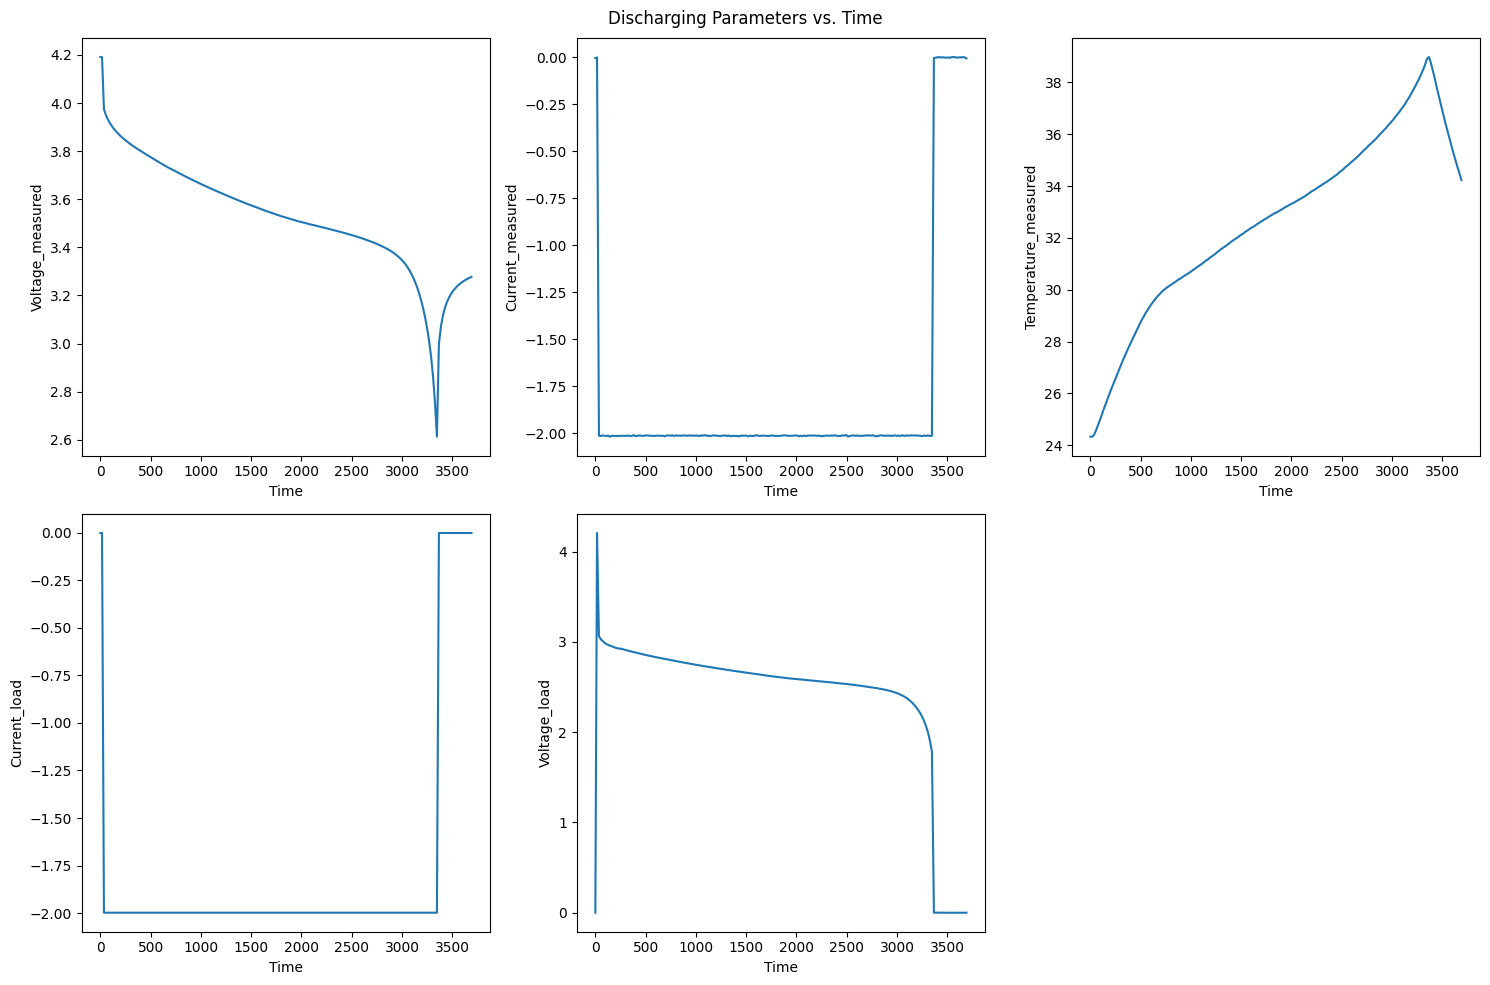

In [148]:
discharge_data = pd.read_csv('data/nasa_processed_data/00002.csv')
df_discharge = pd.DataFrame(discharge_data)

# Create a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
columns = discharge_data.columns

# Plot each parameter against time
sns.lineplot(x='Time', y=columns[0], data=df_discharge, ax=axes[0, 0])
sns.lineplot(x='Time', y=columns[1], data=df_discharge, ax=axes[0, 1])
sns.lineplot(x='Time', y=columns[2], data=df_discharge, ax=axes[0, 2])
sns.lineplot(x='Time', y=columns[3], data=df_discharge, ax=axes[1, 0])
sns.lineplot(x='Time', y=columns[4], data=df_discharge, ax=axes[1, 1])

# Remove empty subplot
fig.delaxes(axes[1, 2])
plt.suptitle('Discharging Parameters vs. Time')

plt.tight_layout()
plt.show()

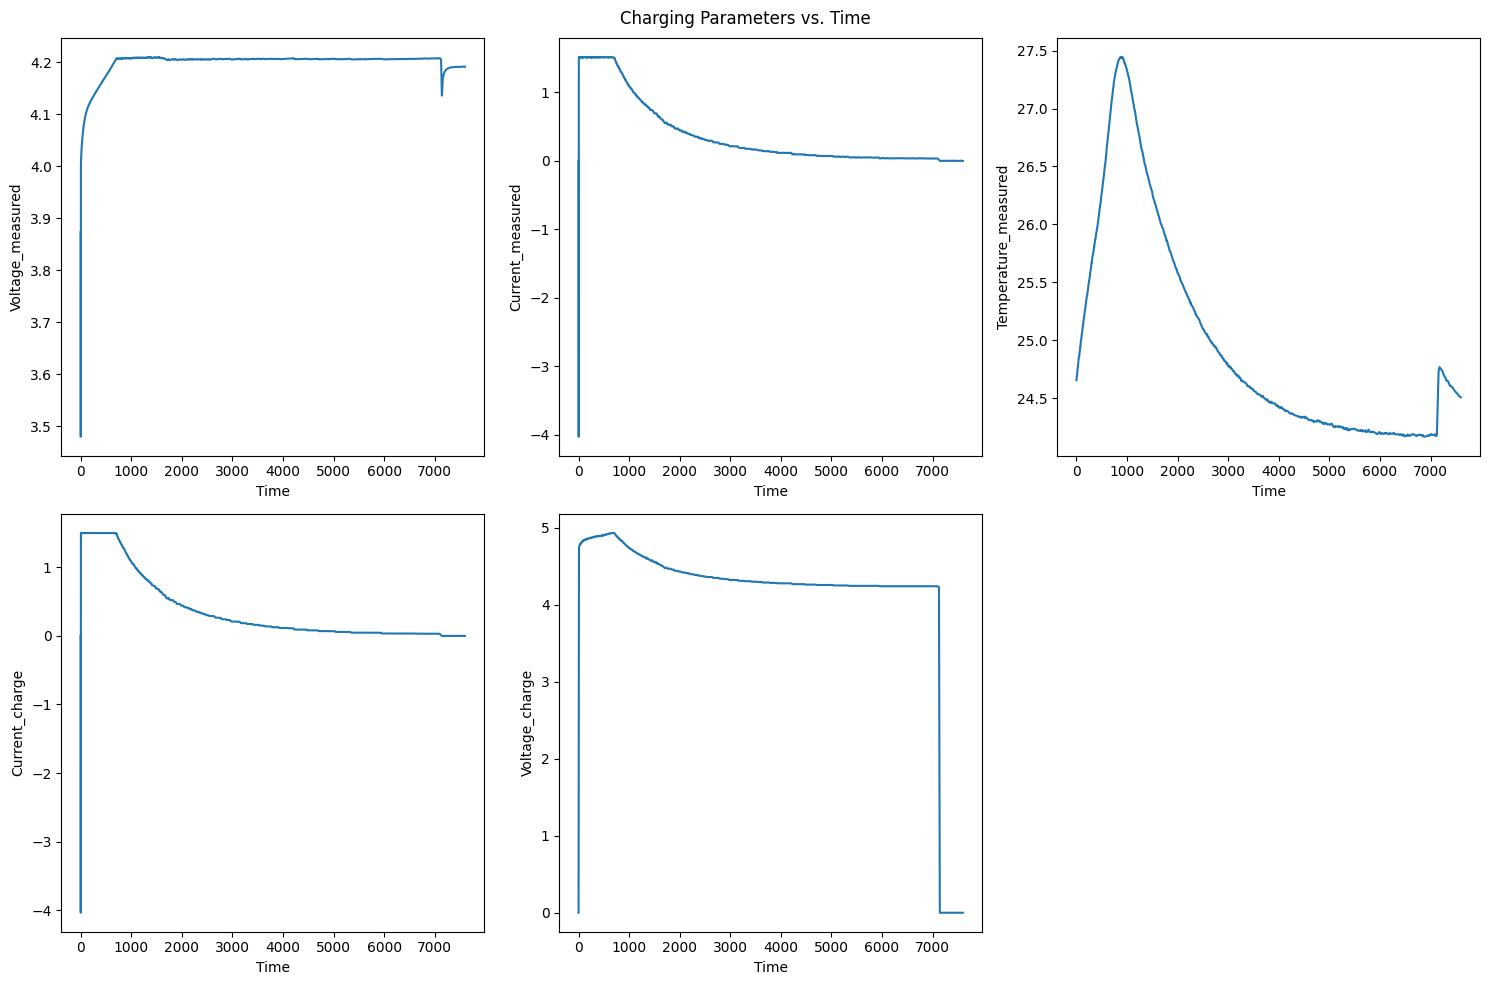

In [154]:
charge_data = pd.read_csv('data/nasa_processed_data/00001.csv')
df = pd.DataFrame(charge_data)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
columns = charge_data.columns

# Plot each parameter against time
sns.lineplot(x='Time', y=columns[0], data=df, ax=axes[0, 0])
sns.lineplot(x='Time', y=columns[1], data=df, ax=axes[0, 1])
sns.lineplot(x='Time', y=columns[2], data=df, ax=axes[0, 2])
sns.lineplot(x='Time', y=columns[3], data=df, ax=axes[1, 0])
sns.lineplot(x='Time', y=columns[4], data=df, ax=axes[1, 1])

# Remove empty subplot
fig.delaxes(axes[1, 2])
plt.suptitle('Charging Parameters vs. Time')

plt.tight_layout()
plt.show()